# Pre Entrega #2:
### Visualizaciones en Python.
#### José María Reyes Retana Tamayo
##### Data Science - 32845
##### Profesor: Luis Ramírez

### Data Set 3: Conjunto de cervezas, su perfil y calificación por consumidores.
Se presenta el siguiente data set por el interés personal que tengo en la cerveza, pues es mi bebida favorita. Aunque el data set presenta solo de cerveceras locales de EEUU, los valores que se incluyen, se espera, permitirán encontrar una correlación a través de un análisis de los datos.
La industria de la cerveza es tan grande como humanos habemos y tan antigua como nuestra misma especie, su fabricación y consumo ha evolucionado con nosotros y el mercado cada vez está más lleno de competidores que buscan traer a la mesa (literalmente) una bebida que se diferencíe del resto y cause un impacto en el consumidor tal que este quiera seguir consumiéndola.
Para este trabajo, se cuenta únicamente con datos que describen a la bebida de acuerdo a las normativas internacionales vigentes, así como calificaciones dadas por consumidores de EEUU.
Se ha elegido este data set, no solo por ser el más extenso de los presentados en la Pre-entrega 1, si no también por el interés personal, pues soy un aficionado a la cerveza desde hace muchos años.

#### Se carga el data set.
El data set se carga desde un archivo descargado de el sitio web Kaggle en formato '.csv'.

In [90]:
import pandas as pd
import numpy as np

data_set_csv = "/workspaces/Coderhouse/Proyecto/Data/Raw/Beer Profiles and Ratings.csv"

data_set = pd.read_csv(data_set_csv)
data_frame = pd.DataFrame(data_set)
data_frame

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:,8.8,35,50,15,37,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,6.0,35,50,15,31,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:,6.8,35,50,8,44,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


#### Variables de estudio:
Este data set contiene 25 columnas, las cuales se describen a continuación.

* Name: nombre de la cerveza, como se presenta en la etiqueta.

* Style: estilo de la cerveza.

* Brewery: nombre de la compañía cervecera que produce.

* Beer Name (Full): identificador único para cada cerveza, presenta nombre de la cerveza y la cervecera.

* Description: descripción de la cerveza de acuerdo al productor, no disponible para todas las cervezas presentadas.

* ABV: contenido de alcohol (% por volumen).
###### “International Bitterness Unit”, es la unidad utilizada para cuantificar que tan amarga es una cerveza. Los valores se presentan en un intervalo de 0 a 100, donde 0 es nada amargo y valores cercanos a 100 representan un alto grado de amargura.
* Min IBU: en esta columna se presentan los valores mínimos esperados de amargura.

* Max IBU: en esta columna se presentan los valores máximos esperados de amargura.
###### Las siguientes columnas presentan una calificación arbitraria otorgada por el autor del documento, que para este estudio se simplificará solo al valor numérico. Para cada uno de los aspectos evaluados por los consumidores. Entre mayor es la calificación, significa que dicha característica es más remarcable o evidente en la bebida.
* Astringency: astringencia.

* Body: cuerpo, que tan “densa” se siente en la boca.

* Alcohol: sensación de alcohol. No confundir con los grados de alcohol que es una medida objetiva, esta es la sensación que los consumidores tuvieron.

* Bitter: amargor. No confundir con los grados IBU que es una medida objetiva, esta es la sensación que los consumidores tuvieron.

* Sweet: dulzor.

* Sour: sabor ácido.

* Fruits: sabor afrutado.

* Hoppy: sabor a lúpulo.

* Spices: sabor a especias.

* Malty: sabor a malta (de cebada, trigo o cualquiera que sea el cereal con el que se elaboró la cerveza).
###### Las últimas seis columnas presentan la calificación general que los consumidores otorgaron a los distintos aspectos de la cerveza y el promedio general. Las calificaciones van del 0 al 5, puesto que la información fue obtenida de un portal donde se evaluaba mediante estrellas, siendo 5 el máximo valor posible.
* review _ aroma: evaluación del aroma (percepción olfativa) de la cerveza.

* review _ appearance: evaluación de la apariencia (percepción visual) de la cerveza.

* review _ palate: evaluación de la sensación en el paladar.

* review _ taste: evaluación del sabor (percepción del gusto) de la cerveza.

* review _ overall: evaluación global de la cerveza.
* number _ of _ reviews: total de evaluaciones recibidas.

###### La base de datos ha sido obtenida de: https://www.kaggle.com/code/aeryan/spotify-music-analysis/data

In [91]:
#Se presenta la información del Data Frame:
print(data_frame.shape)
print(data_frame.ndim)
print(data_frame.size)
print(data_frame.columns)

(3197, 25)
2
79925
Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')


In [92]:
#Se utiiza el método dtypes, aunque posteriormente se implementa ".info()" que resulta más completo.
data_frame.dtypes

Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
dtype: object

In [93]:
#Se presentan el número de datos nulos en cada columna.
data_frame.isnull().sum()

Name                 0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

De acuerdo a las columnas observadas en la base de datos, se establece que las variables más importantes a estudia serán:

*El grado de alcohol.

*Valores de IBU.

*Valores de las evaluaciones (últimas 6 columnas mencionadas en el apartado anterior: Aroma, Apariencia, Sensación en el Paladar, Sabor, General y número de revisiones totales).

Para esta segunda pre-entrega, las gráficas que se realizarán se basarán en dichas 8 (ocho) variables.

Adicional, se propone encontrar una correlación entre las características promedio de una cerveza y el estilo con el que sus creadores la identificaron para comprobar que tan estandarizados están dichos estilos entre los productores y maestros cerveceros.

In [94]:
#Método .info() para presentar la cantidad de objetos no vacíos de cada columna y el tipo de dato.
#El método se aplica exclusivamente a las columnas que más nos interesan.
data_frame.loc[(),("Name","ABV","Min IBU","Max IBU","review_aroma","review_palate","review_taste","review_overall","number_of_reviews")].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               0 non-null      object 
 1   ABV                0 non-null      float64
 2   Min IBU            0 non-null      int64  
 3   Max IBU            0 non-null      int64  
 4   review_aroma       0 non-null      float64
 5   review_palate      0 non-null      float64
 6   review_taste       0 non-null      float64
 7   review_overall     0 non-null      float64
 8   number_of_reviews  0 non-null      int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 0.0+ bytes


Como previa al análisis que se siguirá haciendo a lo largo del curso a través de las distintas entregas, se aplica el método "**describe( )**" a la base de datos para conocer un poco más de ella.

Por estética, el método se aplica a la base de datos transpuesta.

El método **describe( )**, presenta información estadística de cada variable, como lo son el número de elementos, el promedio, la desviación estándar y los valores mínimo y máximo.

In [95]:
#Método describe()
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
ABV,3197.0,6.526688,2.546997,0.000000,5.000000,6.000000,7.600000,57.500000
Min IBU,3197.0,21.180482,13.242242,0.000000,15.000000,20.000000,25.000000,65.000000
Max IBU,3197.0,38.986863,21.355281,0.000000,25.000000,35.000000,45.000000,100.000000
Astringency,3197.0,16.515796,10.410661,0.000000,9.000000,14.000000,21.000000,81.000000
Body,3197.0,46.129496,25.947842,0.000000,29.000000,40.000000,58.000000,175.000000
Alcohol,3197.0,17.055990,17.331334,0.000000,6.000000,11.000000,22.000000,139.000000
Bitter,3197.0,36.364404,25.791152,0.000000,17.000000,31.000000,52.000000,150.000000
Sweet,3197.0,58.270879,34.281310,0.000000,33.000000,54.000000,77.000000,263.000000
Sour,3197.0,33.145449,35.780172,0.000000,11.000000,22.000000,42.000000,284.000000
Salty,3197.0,1.017204,2.132651,0.000000,0.000000,0.000000,1.000000,48.000000


In [96]:
#Se crea una copia del data frame para trabajarlo a futuro.
wrk_df = data_frame.copy()

wrk_df.head(5)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


### Visualizaciones en Python
Para continuar con el análisis a profundidad de nuestro data set elegido, comenzaremos con la presentación de algunos gráficos elaborados usando las librerías de Matplotlib y Seaborn. Estas librerías de uso público, resultan muy útiles para representar gráficamente la información.

Las diferencias entre ambas librerías gráficas son:

In [97]:
#Se debe tener instalado el módulo "openpyxl" para leer la siguiente tabla de comparación.
dif_mtp_sb = pd.read_excel("/workspaces/Coderhouse/Proyecto/Data/Raw/MPLvsSB.xlsx")
dif_mtp_sb

,Caracteristicas,Matplotlib,Seaborn
0,Funcionalidad,Se utiliza para hacer graficos basicos. Los co...,Seaborn contiene una serie de patrones y grafi...
1,Sintaxis,Utiliza una sintaxis comparativamente compleja...,Utiliza una sintaxis comparativamente simple q...
2,Repartir varias cifras,Podemos abrir y usar varias figuras simultanea...,Seaborn establece el tiempo para la creacion d...
3,Visualizacio,Matplotlib esta bien conectado con Numpy y Pan...,Seaborn se siente mas comodo en el manejo de m...
4,Flexibilidad,Matplotlib es un altamente personalizado y rob...,Seaborn evita la superposicion de tramas con l...
5,Marcos de datos y arreglos,Matplotlib funciona de manera eficiente con ma...,Seaborn es mucho mas funcional y organizado qu...
6,Casos de uso,Matplotlib traza varios graficos usando Pandas...,Seaborn es la version extendida de Matplotlib ...


#### Se importa la librería Matplotlib.
Se inicia a trabajar con Matplotlib primero siguiendo simplemente el orden del curso. Para esto se importa dicha librería con el alias **mpl** y la sublibrería pyplot como **plt**, de acuerdo al estándar.

In [98]:
#Se importa la librería Matplotlib.
import matplotlib as mpl
import matplotlib.pyplot as plt

Por comodidad, para el resto del trabajo, se procede a renombrar los índices de las filas con el nombre de la cerveza que se analiza.

In [99]:
#Columna "Name" se usa como índice.
wrk_df = wrk_df.set_index('Name')
wrk_df.head(5)

,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
Name,,,,,,,,,,,,,,,,,,,,,
Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


##### Análisis del IBU:
Presentamos el valor promedio de IBU para los tipos de cerveza.

Para esto, utilizaremos un gráfico de caja (Box Plot) que nos permita revisar el comportamiento de esta variable; pero primero, utilizaremos la información de las columnas Min IBU y Max IBU para no tener sesgos.

In [100]:
#Obtenemos un array con el promedio de IBU de cada cerveza.
prom_IBU = pd.DataFrame((wrk_df[["Min IBU", "Max IBU"]].mean(axis = 1)), columns = ['IBU_Promedio'])
prom_IBU

,IBU_Promedio
Name,
Amber,37.5
Double Bag,37.5
Long Trail Ale,37.5
Doppelsticke,37.5
Sleigh'r Dark Doüble Alt Ale,37.5
...,...
Winter Shredder,42.5
The First Snow Ale,42.5
Red Nose Winter Ale,42.5


In [101]:
#Obtenemos la descripción estadística de nuestro array.
prom_IBU.describe()

,IBU_Promedio
count,3197.000000
mean,30.083672
std,16.692466
min,0.000000
25%,20.000000
50%,25.000000
75%,37.500000
max,82.500000


In [102]:
#Agregamos la columna IBU Promedio a nuestra copia del Data Set.
wrk_df = pd.concat([wrk_df,prom_IBU], axis = 1)

wrk_df.head()

,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,...,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,IBU_Promedio
Name,,,,,,,,,,,,,,,,,,,,,
Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,...,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,37.5
Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,...,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,37.5
Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,...,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,37.5
Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,...,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,37.5
Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,...,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,37.5


In [103]:
#Características para nuestros gráficos.
mpl.rcParams['axes.titleweight'] = 'heavy'

Respecto a los grados IBU de cada cerveza, iniciaré el análisis planteando las siguientes hipótesis:

**1)** *Entre mayor sea la clasificación de grados IBU de una cerveza, esta tendrá un mercado más de nicho, por lo que: habrá menos cantidad de cervezas con grados IBU elevados.*

**2)** *Las cervezas con mayores grados IBU tendrán menos consumidores (por ende un menor número de calificaciones).*

Los grados IBU de una cerveza representan el amargor que esta pueda tener en su sabor y van directamente relacionados a la aportación de lúpulo (hops en inglés) durante el proceso de elaboración de la bebida, por lo anterior, las variables contra las que compararemos nuestra columna creada de "IBU_Promedio", serán:
* Calificación de sabor (review_taste).
* Sensación de lúpulo (Hoppy).

Del, mismo modo, para evaluar la hipótesis, evaluaremos contra las columnas:
* Calificación global (review_overall).
* Cantidad de calificaciones (number_of_reviews).

De acuerdo con el portal "https://www.beersandtrips.com/" podemos clasificar las cervezas de acuerdo a sus grados IBU como:
* De 5 a 20 IBU Poco amarga.
* De 21 a 35 IBU Amarga.
* De 36 a 50 IBU Bastante amarga.
* Más de 50 IBU Muy amarga.
* Más de 100 IBU Solo apta para fans del amargor extra.

Por lo anterior, para fines de este estudio, consideraremos "*grados IBU más elevados*" como todos aquellos superiores a 35.

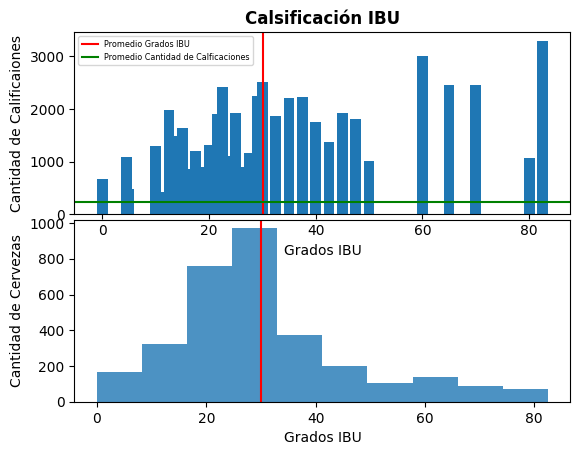

In [104]:
#Calculamos el valor promedio de los Grados IBU y de calificaciones por cerveza.
IBU_promedio = wrk_df["IBU_Promedio"].mean()
prom_no_calif = wrk_df["number_of_reviews"].mean()

#Graficamos el pormedio de IBU en un gráfico tipo histograma.
IBU1 = plt.subplot2grid((12,12),(6,0), rowspan = 6, colspan = 12)
IBU1.hist(wrk_df["IBU_Promedio"], label = 'Grados IBU', alpha = 0.8)
IBU1.axvline(IBU_promedio, color='red', label = 'Promedio')
IBU1.set_xlabel(xlabel = 'Grados IBU')
IBU1.set_ylabel(ylabel = 'Cantidad de Cervezas')
IBU1.set_title(label = 'Calsificación IBU')

#Graficamos la cantidad de calificaciones por niveles de IBU en un gráfico de barras.
IBU3 = plt.subplot2grid((12,12),(0,0), rowspan = 6, colspan = 12)
IBU3.bar(wrk_df["IBU_Promedio"], wrk_df["number_of_reviews"], width = 2)
IBU3.axvline(IBU_promedio, color='red', label = 'Promedio Grados IBU')
IBU3.axhline(prom_no_calif, color='green', label = 'Promedio Cantidad de Calficaciones')
IBU3.set_xlabel(xlabel = 'Grados IBU')
IBU3.set_ylabel(ylabel = 'Cantidad de Calificaiones')
IBU3.set_title(label = 'Calsificación IBU')

mpl.rcParams["legend.fontsize"] = 'xx-small'
IBU3.legend()

Vemos que el promdio de los grados IBU para nuestra muestra de cervezas es poco más que 40. Existen muchas variedades de Cerveza que entrarían en esa clasificación de IBU, por lo mismo no se realiza un análisis de la variedad de cerveza, si no de que tanto gustan estas.

El promedio de Grados IBU (promedio) para nuestra muestra de estudio es de 30.08 grados, esto está en línea con lo que se investigó previamente.

Se evaluan los estilos de cerveza de acuerdo a su graduación IBU promedio. Para esto, puesto que la columna original de "Style" presenta, separados por un guión medio, la clasificación secundaria de los estilos de cerveza y esto convierte dicha variable en un conjunto de muchos más elementos sin que estos, a su vez presenten más información o de calidad, se decide separar en dos columnas.

In [105]:
#Separando la columna Style
wrk_df[["Style", "Secondary Style"]] = wrk_df.Style.str.split(" - ", expand = True)
print(wrk_df["Style"].value_counts())

Lager                              567
Stout                              254
Wheat Beer                         206
Porter                             164
IPA                                163
Bock                               155
Strong Ale                         148
Lambic                             100
Pale Ale                            98
Brown Ale                           94
Red Ale                             90
Pilsner                             86
Bitter                              74
Farmhouse Ale                       72
Blonde Ale                          64
Barleywine                          64
Sour                                57
Mild Ale                            47
Dubbel                              41
Winter Warmer                       40
Altbier                             39
Tripel                              37
Rye Beer                            37
Fruit and Field Beer                37
Scotch Ale / Wee Heavy              35
Quadrupel (Quad)         

/tmp/ipykernel_13555/101623939.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrk_df["Style"].unique(), fontsize = 8, rotation = 90)


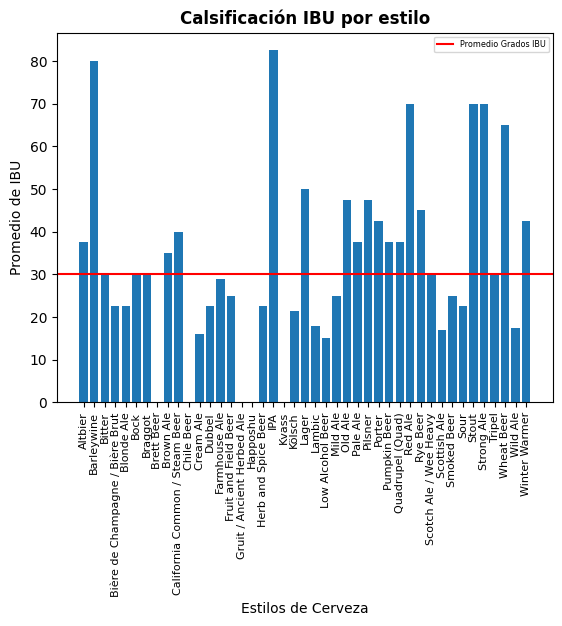

In [123]:
#Se presenta un gráfico para indicar el promedio de grados IBU por variedad de cerveza.
IBU5,ax = plt.subplots()

ax.bar(wrk_df["Style"], wrk_df["IBU_Promedio"])

ax.set_xlabel(xlabel = 'Estilos de Cerveza')
ax.set_ylabel(ylabel = 'Promedio de IBU')
ax.set_title(label = 'Calsificación IBU por estilo')
ax.set_xticklabels(wrk_df["Style"].unique(), fontsize = 8, rotation = 90)
ax.axhline(IBU_promedio, color='red', label = 'Promedio Grados IBU')

ax.legend()

plt.show()

Los estilos con mayor graduación IBU son:

* IPA (Indian Pale Ale).

* Barleywine.

* Red Ale.

* Stout.

* Strong Ale.

In [107]:
#Observaciones adicionales.
cant_cerv_calif = len(wrk_df["IBU_Promedio"])
cerv_menor_IBU = len(wrk_df.loc[(wrk_df.IBU_Promedio > IBU_promedio),"IBU_Promedio"])

print("Los grados promedio para el IBU son: {} grados." .format(round(IBU_promedio, 2)))
print("Se presentan {} cervezas en total, de las cuales, {} tienen más grados IBU que el promedio." .format(cant_cerv_calif,cerv_menor_IBU))
print("En promedio, cada cerveza fue calificada {} veces." .format(round(prom_no_calif,2)))

Los grados promedio para el IBU son: 30.08 grados.
Se presentan 3197 cervezas en total, de las cuales, 1028 tienen más grados IBU que el promedio.
En promedio, cada cerveza fue calificada 233.28 veces.


A continuación analizaremos las calificaciones de los consumidores vs los grados IBU.

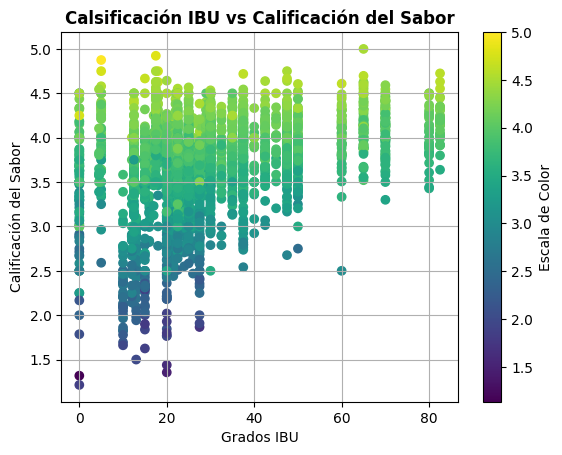

In [108]:
#Graficamos la columna IBU Promedio vs la columna review_taste, donde el color de cada punto vendrá dado por la columna
#review overall.
IBU2,ax = plt.subplots()

#Nombramos al gráfico para posteriormente poder crear la escala de color.
IBUsc = ax.scatter(wrk_df['IBU_Promedio'], wrk_df['review_taste'], c = wrk_df['review_overall'])
ax.set_xlabel(xlabel = 'Grados IBU')
ax.set_ylabel(ylabel = 'Calificación del Sabor')
ax.set_title(label = 'Calsificación IBU vs Calificación del Sabor')
ax.grid(visible = True)

#Creamos la escala de color de acuerdo a la variable review_overall.
cbar = IBU2.colorbar(IBUsc)
cbar.set_label('Escala de Color')

Podemos observar que la calificación de sabor y la calificación general tienen una correlación muy cercana puesto que vemos que los puntos de color verde-amarillo (máxima calificación general) suelen estar en la parte superior del gráfico (máxima calificación del sabor).

Así mismo, encontramos que a mayor grado de IBU, las calificaciones suelen ser más positivas tanto para sabor como en general para esas cervezas, de esto podemos asumir lo siguiente:

Las cervezas de más grados IBU suelen ser de más nicho, por ende, su apreciación es mayor, en promedio, entre más alta sea la clasificación por IBU. Esto lo podemos demostrar comparando los resultados del Gráfico "Clasificación IBU", donde se observa que las cervezas con grados IBU superiores al promedio son menos de la mitad de las analizadas.

In [109]:
#Crearemos un Data Frame adicional para ordenarlo y poder realizar gráficos auxiliares que nos ayuden a mejor entender la
# relación de los grados IBU con la sensación de los consumidores.
wrk_df.rename(columns = {"Min IBU" : "Min_IBU"}, inplace = True)
wrk_df.rename(columns = {"Max IBU" : "Max_IBU"}, inplace = True)

IBU_df = wrk_df[["Min_IBU", "Max_IBU", "IBU_Promedio", "Hoppy", "Bitter"]].copy()
IBU_df = IBU_df.sort_values(by = ["IBU_Promedio"])
IBU_df = IBU_df.reset_index()
IBU_df = IBU_df.drop("Name", axis = 1)

IBU_df = (IBU_df - IBU_df["Min_IBU"].min())/(IBU_df["Max_IBU"].max() - IBU_df["Min_IBU"].min())
IBU_df["Hoppy"] = (IBU_df["Hoppy"] - IBU_df["Hoppy"].min())/(IBU_df["Hoppy"].max() - IBU_df["Hoppy"].min())
IBU_df["Bitter"] = (IBU_df["Bitter"] - IBU_df["Bitter"].min())/(IBU_df["Bitter"].max() - IBU_df["Bitter"].min())

IBU_df

,Min_IBU,Max_IBU,IBU_Promedio,Hoppy,Bitter
0,0.00,0.0,0.000,0.395349,0.106667
1,0.00,0.0,0.000,0.133721,0.120000
2,0.00,0.0,0.000,0.122093,0.100000
3,0.00,0.0,0.000,0.058140,0.040000
4,0.00,0.0,0.000,0.063953,0.073333
...,...,...,...,...,...
3192,0.65,1.0,0.825,0.482558,0.393333
3193,0.65,1.0,0.825,0.343023,0.300000
3194,0.65,1.0,0.825,0.587209,0.526667
3195,0.65,1.0,0.825,0.593023,0.546667


Para poder homgenizar las magnitudes de las columnas presentadas, se escalaron todas las columnas partiendo de que el mínimo de la columna Min_IBU (0.00) será el valor 0 (cero) y el máximo de la columna Max_IBU (115.00) será 1 (uno o cien porciento).

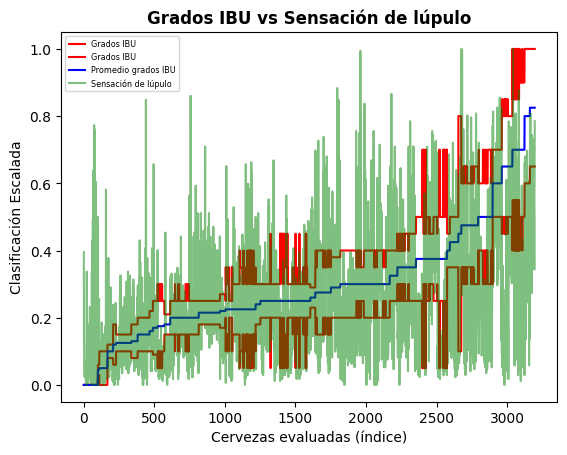

In [110]:
#Creamos la gráfica tipo líneas para marcar los parámetros escalados de las grados IBU y la sensación de lúpulo.
IBU4,ax = plt.subplots()

ax.plot(IBU_df.index, IBU_df["Min_IBU"], c = "red", label = "Grados IBU")
ax.plot(IBU_df.index, IBU_df["Max_IBU"],c = "red", label = "Grados IBU")
ax.plot(IBU_df.index, IBU_df["IBU_Promedio"],c = "blue", label = "Promedio grados IBU")
ax.plot(IBU_df.index, IBU_df["Hoppy"], alpha = 0.5, c = "green", label = "Sensación de lúpulo")

ax.set_xlabel(xlabel = 'Cervezas evaluadas (índice)')
ax.set_ylabel(ylabel = 'Clasificación Escalada')
ax.set_title(label = 'Grados IBU vs Sensación de lúpulo')

ax.legend()

En el gráfico anterior, podemos observar que la evaluación de la "sensación de lúpulo" de los consumidores/calificadores, no tiene ninguna correlación con los niveles de IBU declarados por la empresa que fabrica las respectivas cervezas.

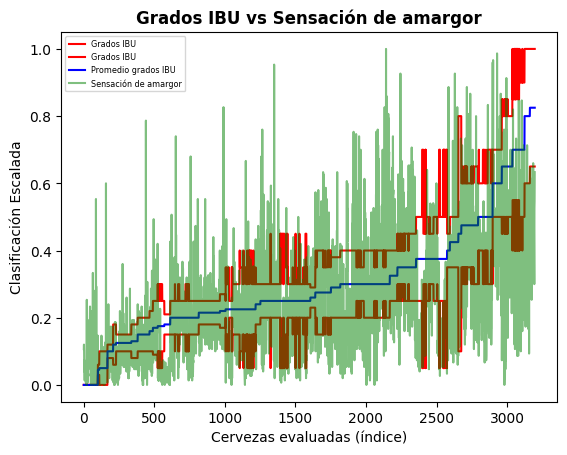

In [111]:
#Creamos la gráfica tipo líneas para marcar los parámetros escalados de las grados IBU y la sensación de lúpulo.
IBU4,ax = plt.subplots()

ax.plot(IBU_df.index, IBU_df["Min_IBU"], c = "red", label = "Grados IBU")
ax.plot(IBU_df.index, IBU_df["Max_IBU"],c = "red", label = "Grados IBU")
ax.plot(IBU_df.index, IBU_df["IBU_Promedio"],c = "blue", label = "Promedio grados IBU")
ax.plot(IBU_df.index, IBU_df["Bitter"], alpha = 0.5, c = "green", label = "Sensación de amargor")

ax.set_xlabel(xlabel = 'Cervezas evaluadas (índice)')
ax.set_ylabel(ylabel = 'Clasificación Escalada')
ax.set_title(label = 'Grados IBU vs Sensación de amargor')

ax.legend()

Este gráfico resulta muy similar que el anterior, por lo que no se puede concluir nada al respecto.

#### Conclusiones sobre los grados IBU en una cerveza:
Podemos concluir que la hipótesis **1** es verdadera, pues encontramos que más de la mitad de las cervezas de esta base de datos cuenta con una graduación IBU por debajo de 40, de aquí llegamos a que el mercado de cervezas con grados "elevados" de amargor está concentrado en un nicho.

Sobre la hipótesis **2**, con la información presente, se considera que ha sido falsa, pues podemos ver que las cervezas con una graduación de amargor superior a 60 resultaron ser las que más evaluaciones tuvieron. Se requeriría un estudio más especializado para profundizar en esta hipótesis.

#### Se importa la librería Seaborn
Para la siguiente parte del análisis mediante gráficos, se trabajará con la librería Seaborn para Python, esta presenta diferentes formas de realizar gráficos que Matplotlib.

In [112]:
#Se importa la librería Seaborn.
import seaborn as sns

#### Análisis de las reseñas

Para este segundo análisis, se hará una revisión cruzada de todas las variables relacionadas a las reseñas/calificación de los encuestados, encontrando si exiten correlaciones entre ellas y cual es la mejor combinación para tener una calificación positiva (mayor a 2.5 en nuestra escala).

Las hipótesis para este segundo análisis serán:

**1)** *La calificación dada al sabor será la que mayor correlación positiva tenga con respecto a la calificación global.*

**2)** *La calificación otorgada a la sensación de paladar tendrá mucha cercanía en sus valores con la calificación al sabor.*

Adicional a los objetivos, se presentará un gráfico para conocer que estilo de cerveza es el mejor calificado.

<AxesSubplot: xlabel='review_overall', ylabel='review_taste'>

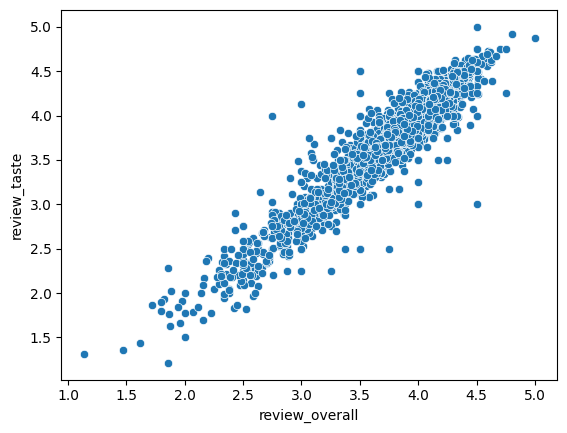

In [124]:
#Primer gráfico para comparar las calificaciones de sabor, aroma, paladar y global.
sns.scatterplot(wrk_df, x = "review_overall", y = "review_taste")